# Make adjective-noun phrases

Now that we have a cleaned list of concrete and abstract words, we can work on constructing phrases. 

In [1]:
import os
import random

import numpy as np
import pandas as pd

from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

## Adjectives

We are interested in studying whether the conceptual semantic system is sensitive to one kind of fine-grained distinction studied in linguistic semantics, called denotational semantics. Denotational semantics are driven by subsective adjectives (e.g., good, typical) and non-subsective adjectives (e.g., fake, former). The contrast in denotation arises only when the adjective composes with a noun. For example, a "typical diamond" is a diamond, while a "fake diamond" is not a diamond.

We start with non-subsective adjectives because they are more sparsely distributed in natural language. [Nayak and colleagues (2014)](https://www.cis.upenn.edu/~ccb/publications/non-subsective-adjectives.pdf) compiled a list of non-subsective adjectives. We focused on the privative kind, which has a list of 24 adjectives. We then removed adjectives for which we don't have readily available frequency measures (e.g., anti-, ex-, pseudosimulated, adjectives we think are archaic (e.g., erstwhile), and adjectives we think doesn't go well with our nouns (e.g., onetime, deputy). This results in the following 16 privative, non-subsective, adjectives.

In [2]:
adjectives_privative = ['artificial','counterfeit','fabricated','fake','false','fictional','fictitious','former',
                        'hypothetical','imaginary','mock','mythical','past','phony','spurious','virtual'] 

Subsective adjectives are much easier to find. We started with a list of adjectives (n=300) compiled by Lalisse and Asudeh (2015). We then used their classification of subsectives to narrow down to the same number of non-subsective adjectives we obtained above (n=16) that we think would go well with a wide array of concrete and abstract nouns. 

In [3]:
adjectives_subsective = ['actual','authentic','average','bad','current','genuine','good','important',
                         'new','old','perfect','real','special','true','typical','unique']

As single word baselines, we follow Bemis and Pylkkanen (2011) in using unpronounceable consonant strings as 'adjectives', the rationale being that these serves to engage the visual system from bottom-up to roughly the same extent as when it encounters actual adjectives.

In [4]:
consonant_strings = ['xkq', 'qxsw', 'mtpv', 'rjdnw', 'wvcnz', 'zbxlv','tqvgqrz', 'bxfjwts','mghljkqr',
                     'kmlsdjtw','ptrgsbkv','zrtqgfplh','vpbyzkgrf','htbqzylm','ypdcglkc','fxldmr','rvqf']

baselines = pd.DataFrame(consonant_strings, columns=['adjective'])
baselines['length'] = baselines['adjective'].str.len()
baselines.reset_index(drop=True, inplace=True)
print('Mean length: ', baselines.length.mean())
print('Std length: ', baselines.length.std())

Mean length:  6.352941176470588
Std length:  1.9666334327534274


Implement Excel's VLOOKUP function to get a bunch of psycholinguistic properties of these adjectives:
- Zipf frequency measures from SUBTLEX-UK
- semantic diversity from Hoffman et al. (2012)
- age of acquisition ratings from Kuperman et al. (2012)
- concreteness ratings from Brysbaert et al. (2014)

In [5]:
adjectives = pd.DataFrame(data={'word':adjectives_subsective+adjectives_privative,'denotation':['subsective']*len(adjectives_subsective)+['privative']*len(adjectives_privative)})

# read in SUBTLEX UK data
subtlex = pd.read_csv(os.path.join(dir, 'resources', 'SUBTLEX-UK.csv'))
subtlex.rename(columns={'Spelling': 'word', 'LogFreq(Zipf)':'Zipf_frequency'}, inplace=True)
subtlex.set_index('word', inplace=True)
subtlex = subtlex[subtlex.index.notnull()]

# get zipf frequency for each adjective
adjectives['zipf_frequency'] = ''
adjectives.set_index('word', inplace=True)
adjectives['zipf_frequency'] = adjectives.index.map(subtlex['Zipf_frequency'])
adjectives.reset_index(inplace=True)

# read in semantic diversity data
semd = pd.read_csv(os.path.join(dir, 'resources', 'semantic_diversity_Hoffman_etal2012.csv'))
semd.set_index('item', inplace=True)
semd = semd[semd.index.notnull()]

# get semantic diversity for each adjective
adjectives['sem_d'] = ''
adjectives.set_index('word', inplace=True)
adjectives['sem_d'] = adjectives.index.map(semd['SemD'])
adjectives.reset_index(inplace=True)

# read in age of acquisition data
AoA = pd.read_csv(os.path.join(dir, 'resources', 'AoA_ratings_Kuperman_et_al_BRM.csv'))
AoA.set_index('Word', inplace=True)
AoA = AoA[AoA.index.notnull()]

# get semantic diversity for each adjective
adjectives['AoA'] = ''
adjectives.set_index('word', inplace=True)
adjectives['AoA'] = adjectives.index.map(AoA['Rating.Mean'])
adjectives.reset_index(inplace=True)

# read in age of acquisition data
concreteness = pd.read_csv(os.path.join(dir, 'resources', 'brysbaert_etal_2014.csv'))
concreteness.set_index('Word', inplace=True)
concreteness = concreteness[concreteness.index.notnull()]

# get semantic diversity for each adjective
adjectives['concreteness'] = ''
adjectives.set_index('word', inplace=True)
adjectives['concreteness'] = adjectives.index.map(concreteness['Conc_M'])
adjectives.reset_index(inplace=True)

# count word length in number of letters
adjectives['length'] = adjectives['word'].str.len()
adjectives

C:\Users\rl05\AppData\Local\Temp\ipykernel_16816\3894642246.py:4: DtypeWarning: Columns (11,25) have mixed types. Specify dtype option on import or set low_memory=False.
  subtlex = pd.read_csv(os.path.join(dir, 'resources', 'SUBTLEX-UK.csv'))


,word,denotation,zipf_frequency,sem_d,AoA,concreteness,length
0,actual,subsective,4.60,2.10,6.94,2.22,6
1,authentic,subsective,3.73,1.76,8.42,2.31,9
2,average,subsective,4.73,1.96,8.90,2.40,7
3,bad,subsective,5.56,1.98,2.79,1.68,3
4,current,subsective,4.81,2.13,8.94,3.16,7
5,genuine,subsective,4.37,2.10,9.06,2.03,7
6,good,subsective,6.35,2.20,3.55,1.64,4
7,important,subsective,5.57,2.26,5.79,2.14,9
8,new,subsective,5.98,2.34,4.72,2.81,3
9,old,subsective,5.79,2.14,3.72,2.72,3


In [6]:
print('Adjective concreteness mean')
print(adjectives[['concreteness','length','denotation']].groupby('denotation').mean())
print()
print('Adjective concreteness standard deviation')
print(adjectives[['concreteness','length','denotation']].groupby('denotation').std())

Adjective concreteness mean
            concreteness  length
denotation                      
privative       2.216923  7.6250
subsective      2.164667  5.8125

Adjective concreteness standard deviation
            concreteness    length
denotation                        
privative       0.584328  2.680174
subsective      0.486722  2.040221


### Visualising psycholinguistic properties of these adjectives

Text(0.5, 0.98, 'Psycholinguistic properties of 32 adjectives')

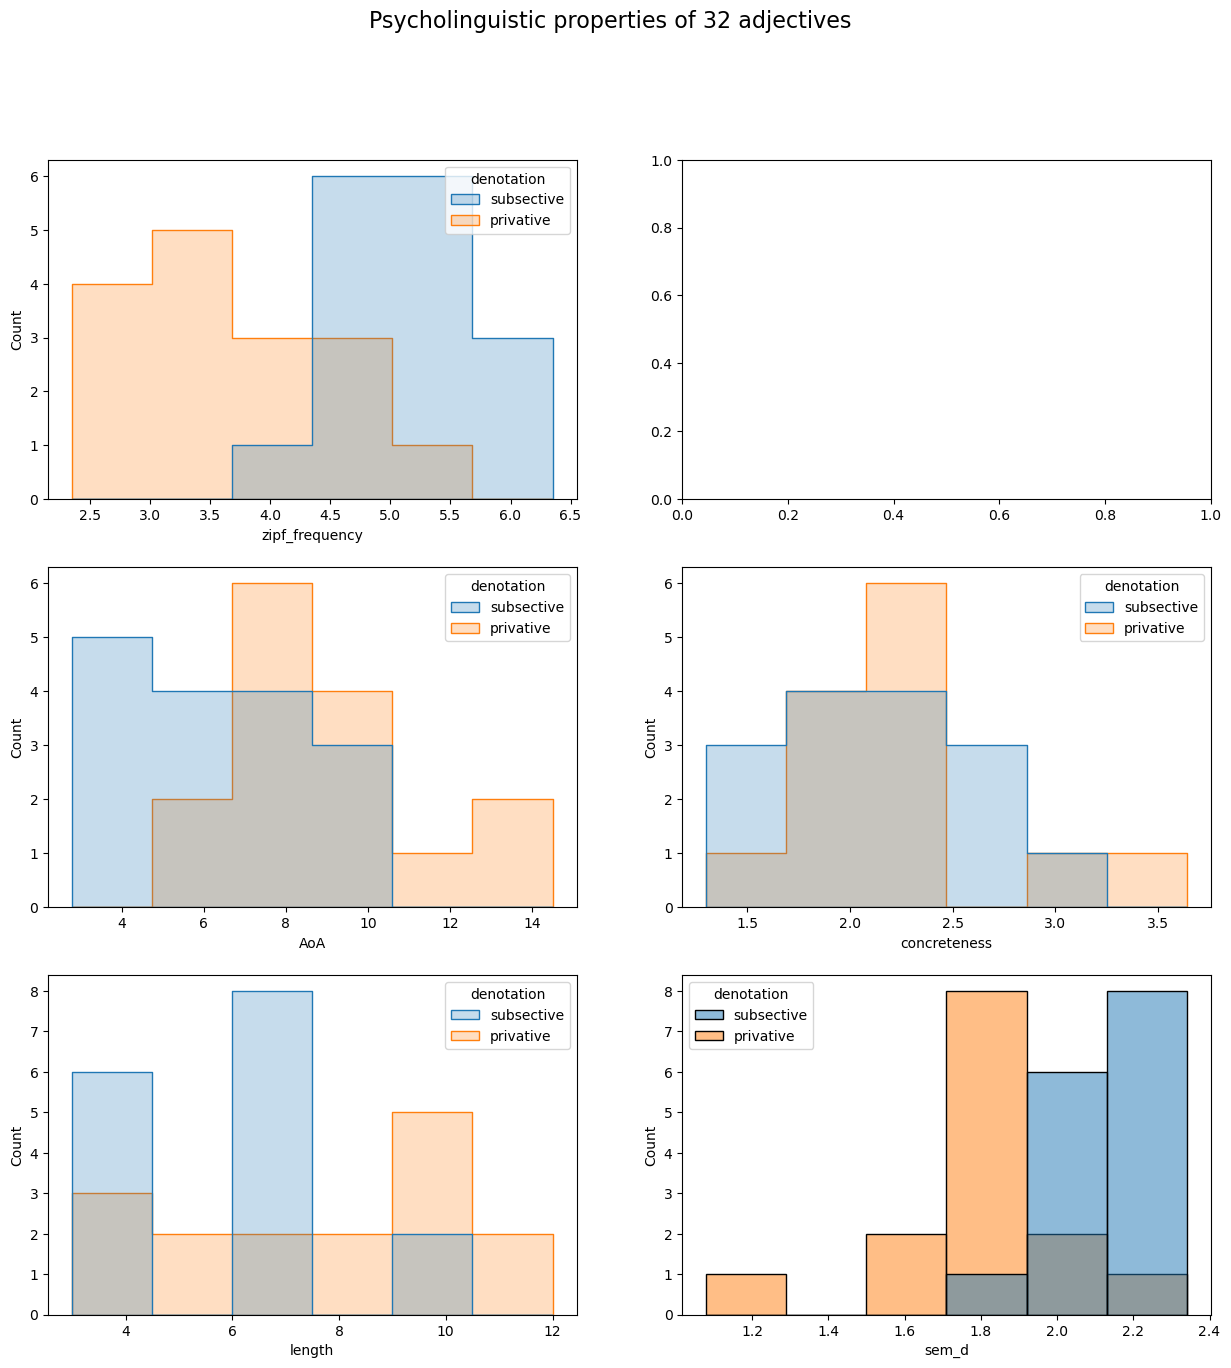

In [7]:
f, ax = plt.subplots(3, 2, figsize=(15,15))
sns.set_context(font_scale=2)
sns.histplot(x='zipf_frequency', hue='denotation', data=adjectives, ax=ax[0,0], element='step')
sns.histplot(x='AoA', hue='denotation', data=adjectives, ax=ax[1,0], element='step')
sns.histplot(x='concreteness', hue='denotation', data=adjectives, ax=ax[1,1], element='step')
sns.histplot(x='length', hue='denotation', data=adjectives, ax=ax[2,0], element='step')
sns.histplot(x='sem_d', hue='denotation', data=adjectives, ax=ax[2,1])
f.suptitle('Psycholinguistic properties of {} adjectives'.format(int(len(adjectives))), fontsize=16)

# Phrases

In [8]:
# read in our cleaned list of nouns 
nouns = pd.read_csv(os.path.join(dir, 'nouns_cleaned_2023-04-14.csv'))

# shuffle adjectives, then repeat them into a list of 298 adjectives
def create_adjective_list(adjectives, nouns):
    adjectives_repeated = (adjectives * 19)[:len(nouns)]
    adjectives_repeated_shuffled = random.Random(42).sample(adjectives_repeated, len(adjectives_repeated)) # create random.Random instance for reproducibility
    return adjectives_repeated_shuffled

array_adjectives = np.empty((3, len(nouns)), dtype='object') # initialise array
for i, adjectives in enumerate([adjectives_subsective,adjectives_privative,consonant_strings]):
    array_adjectives[i] = create_adjective_list(adjectives, nouns)
    
# transpose and flatten to put into big df later
adjectives_all = np.transpose(array_adjectives).flatten()

stimuli = pd.DataFrame(np.repeat(nouns.values, 3, axis=0)) # repeat critical nouns 3 times for 3 denotation conditions
stimuli.columns = nouns.columns # assign column names 
stimuli['denotation'] = ['subsective','privative','baseline'] * len(nouns) # add denotation condition

stimuli['adjective'] = adjectives_all
stimuli['phrase'] = stimuli.adjective + ' ' + stimuli.noun
stimuli

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG,denotation,adjective,phrase
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,subsective,old,old sulphur
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,privative,imaginary,imaginary sulphur
2,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,baseline,tqvgqrz,tqvgqrz sulphur
3,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,subsective,special,special longing
4,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,privative,past,past longing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,syringe,140,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,privative,fictional,fictional syringe
836,syringe,140,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,baseline,zbxlv,zbxlv syringe
837,wrath,140,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,subsective,real,real wrath
838,wrath,140,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,privative,mythical,mythical wrath


Save this list of phrases to disk for to make comprehension questions.

In [9]:
# nouns_x.loc[(nouns_x['denotation'] == 'subsective') | (nouns_x['denotation'] == 'privative')].to_csv(f'phrase_shortlist_{date.today()}.csv')

In [11]:
stimuli.to_csv(f'stimuli_{date.today()}.csv')